## DATA SETUP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from setup import data_setup
from gallifrey.utilities.math import calculate_pca
from gallifrey.particles import rotated_dataset

In [3]:
snapshot = 127
resolution = 4096
sim_id = "09_18"
dwarfs = False
save = False

In [4]:
ds, mw, stellar_model, imf, planet_model = data_setup(
    snapshot, resolution, sim_id, include_dwarfs=dwarfs
)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-06-16 11:58:54,327 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-06-16 11:58:54,396 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-06-16 11:58:54,397 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-16 11:58:54,397 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-16 11:58:54,398 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-06-16 11:58:54,398 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-16 11:58:54,399 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-06-16 11:58:54,399 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-06-16 11:58:54,400 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-06-16 11:58:54,400 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [5]:
from planet_maps import plot_maps
from planet_1dprofiles import plot_1dprofiles
from planet_2dprofiles import plot_2dprofiles

In [6]:
def _mass_weighted_planets(field, data):
    return data["stars", "planets"] / data["stars", "Masses"]


ds.add_field(
    ("stars", "mass_weighted_planets"),
    function=_mass_weighted_planets,
    sampling_type="local",
    units="1/Msun",
)


def _star_weighted_planets(field, data):
    return data["stars", "planets"] / data["stars", "main_sequence_stars"]


ds.add_field(
    ("stars", "star_weighted_planets"),
    function=_star_weighted_planets,
    sampling_type="local",
    units="",
)

## CREATE DATA SOURCE

In [7]:
radius = 60
normal_vector = calculate_pca(
    mw.sphere(radius=(10, "kpc"))["stars", "Coordinates"]
).components_[-1]

In [9]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))
disk_data = rotated_dataset(
    mw.disk(
        radius=ds.quan(radius, "kpc"), height=ds.quan(0.5, "kpc"), normal=normal_vector
    ),
    mw.centre(),
    normal_vector,
    [
        ("stars", "planets"),
        ("stars", "mass_weighted_planets"),
        ("stars", "star_weighted_planets"),
        ("stars", "main_sequence_stars"),
    ],
)

yt : [INFO     ] 2023-06-16 11:59:51,987 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-16 11:59:51,990 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-16 11:59:51,993 Parameters: domain_left_edge          = [-53.69806519 -53.69806519 -53.69806519]
yt : [INFO     ] 2023-06-16 11:59:51,994 Parameters: domain_right_edge         = [51.66095168 51.66095168 51.66095168]
yt : [INFO     ] 2023-06-16 11:59:51,995 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-16 11:59:52,001 Allocating for 1.304e+05 particles


In [ ]:
plt.hist(sphere_data["stars","[Fe/H]"], bins='df')

In [9]:
rotated_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        ("stars", "planets"),
        ("stars", "mass_weighted_planets"),
        ("stars", "star_weighted_planets"),
    ],
)

yt : [INFO     ] 2023-06-16 10:02:17,917 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-16 10:02:17,918 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-16 10:02:17,919 Parameters: domain_left_edge          = [-58.64838778 -58.64838778 -58.64838778]
yt : [INFO     ] 2023-06-16 10:02:17,920 Parameters: domain_right_edge         = [58.67914424 58.67914424 58.67914424]
yt : [INFO     ] 2023-06-16 10:02:17,920 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-16 10:02:17,922 Allocating for 3.454e+05 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-06-16 10:11:06,920 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:06,921 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:06,922 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:06,923 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:06,925 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



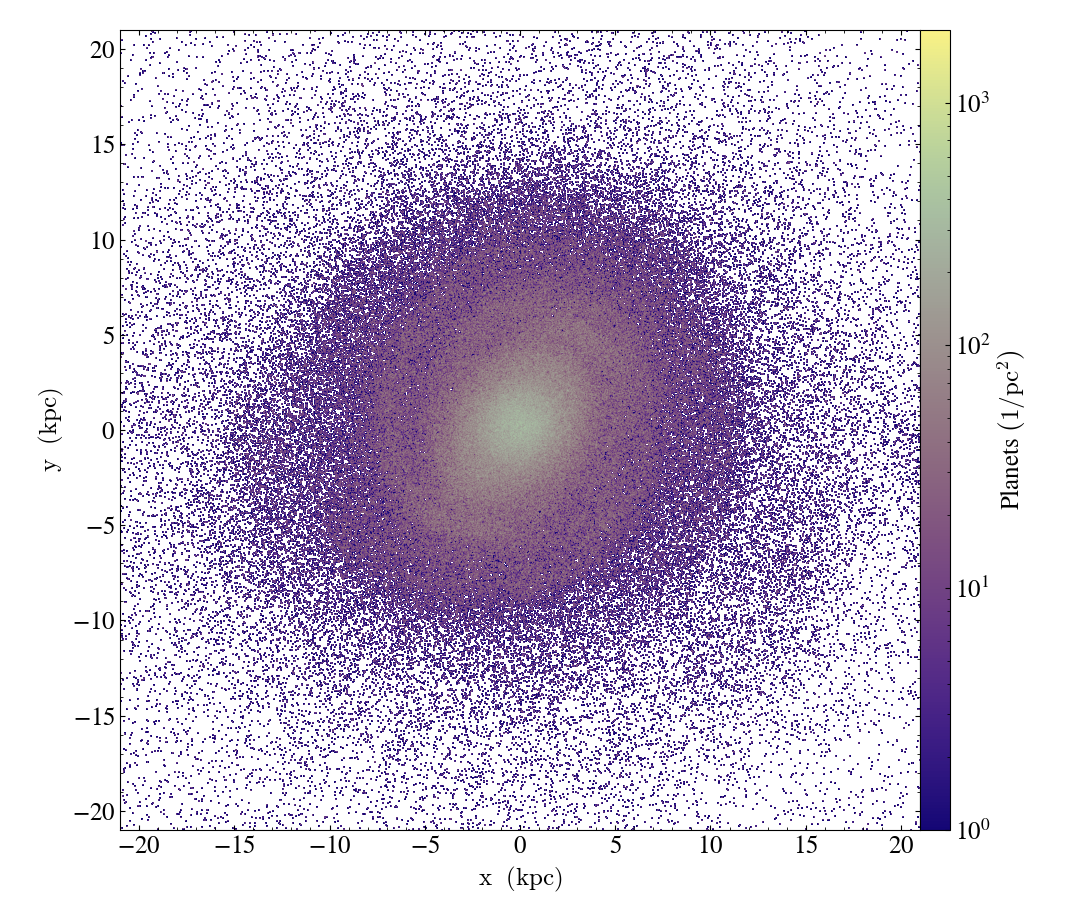

yt : [INFO     ] 2023-06-16 10:11:07,561 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:07,561 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:07,562 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:07,562 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:07,563 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-16 10:11:07,787 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



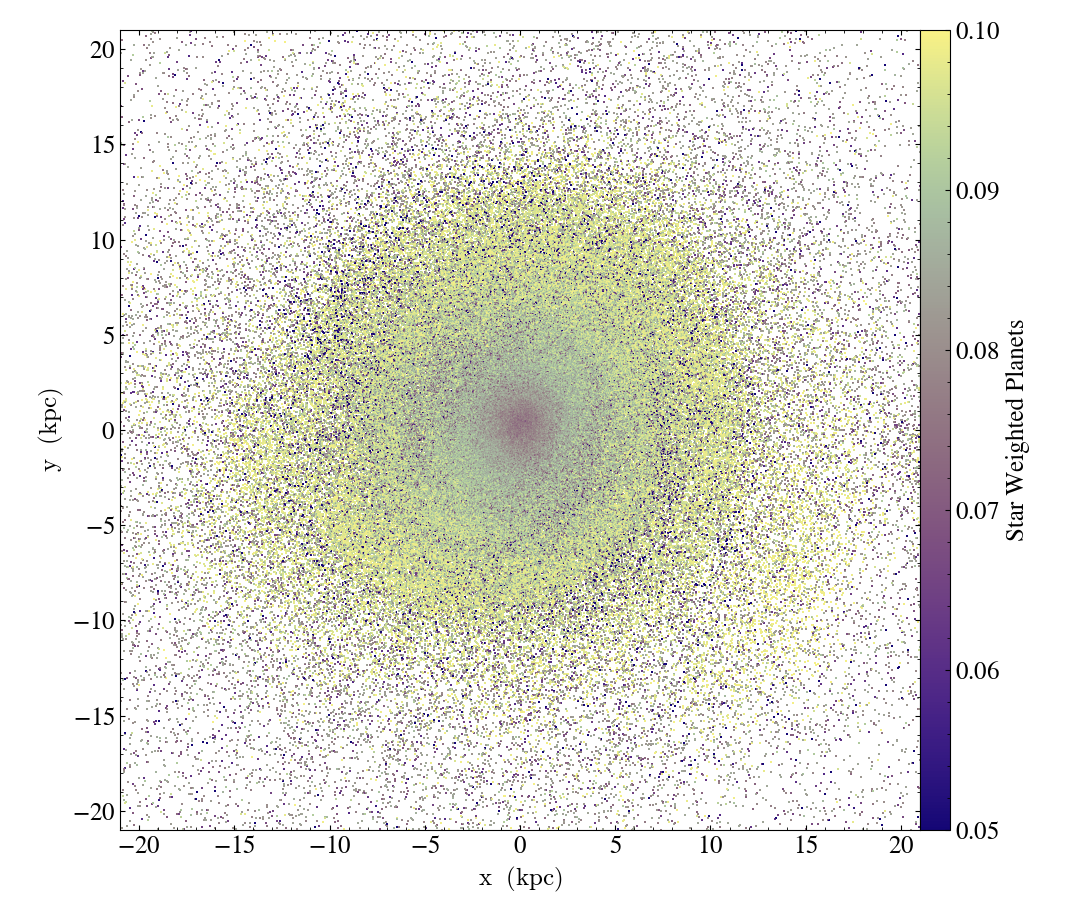
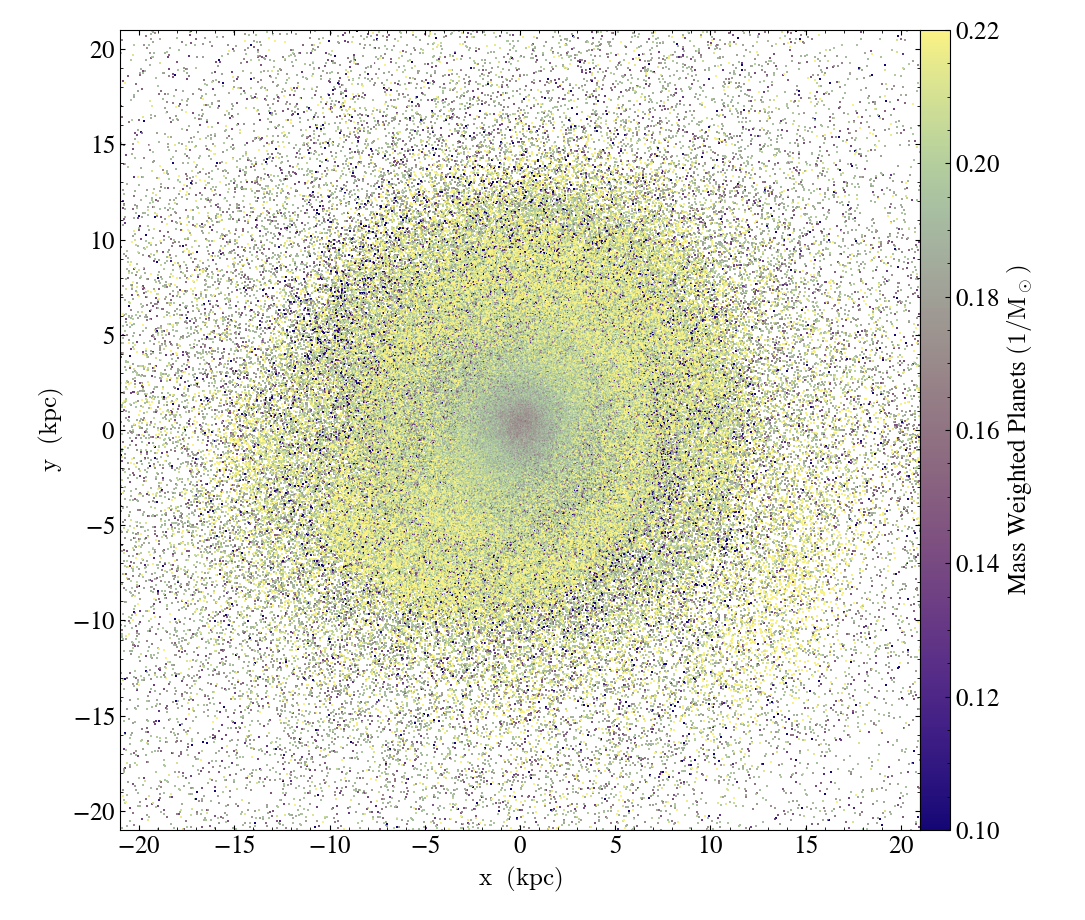

In [24]:
zplot, zplots = plot_maps(rotated_data, axis="z", save=save, no_dwarfs=True, zlims={("stars","star_weighted_planets"): (0.05,.1), ("stars","mass_weighted_planets"): (0.1,.22)})

## SIDE-ON MAPS

yt : [INFO     ] 2023-06-16 10:11:08,947 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:08,947 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:08,948 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:08,948 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:08,950 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



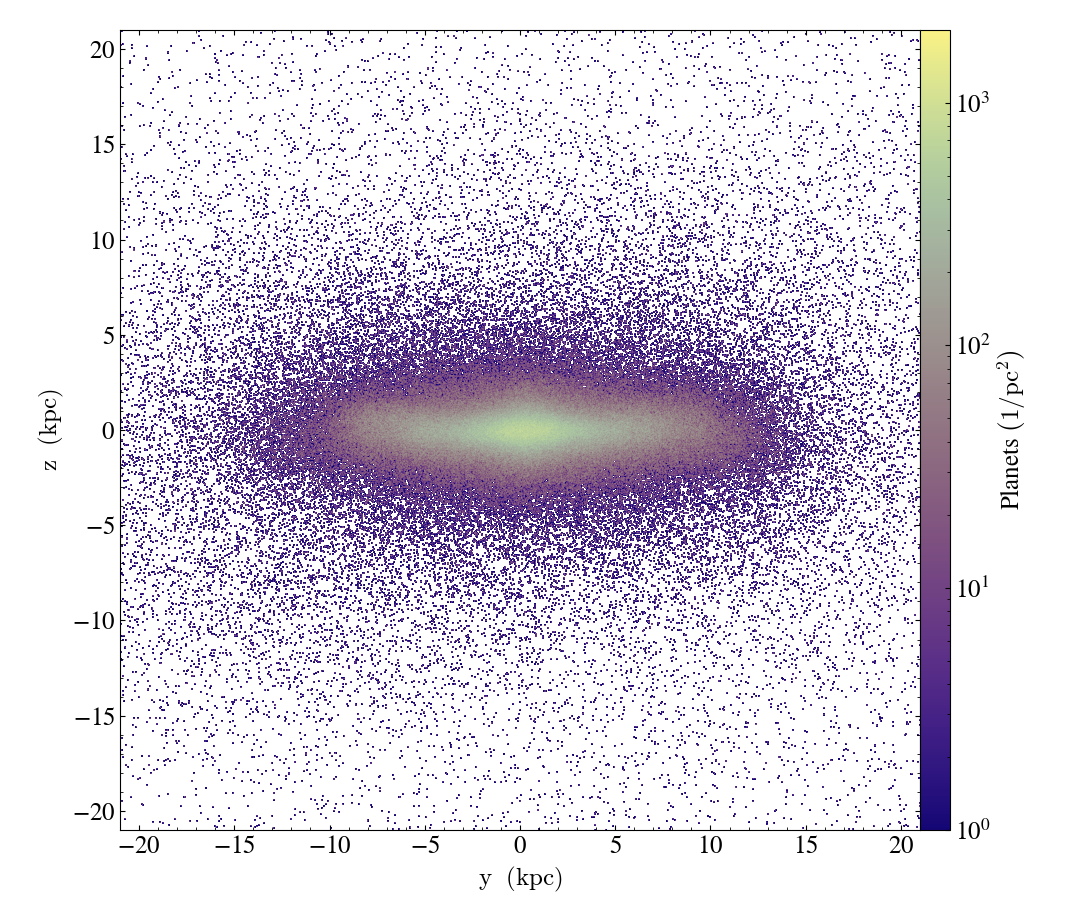

yt : [INFO     ] 2023-06-16 10:11:09,629 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:09,630 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:09,631 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:09,631 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-16 10:11:09,632 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-16 10:11:09,892 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



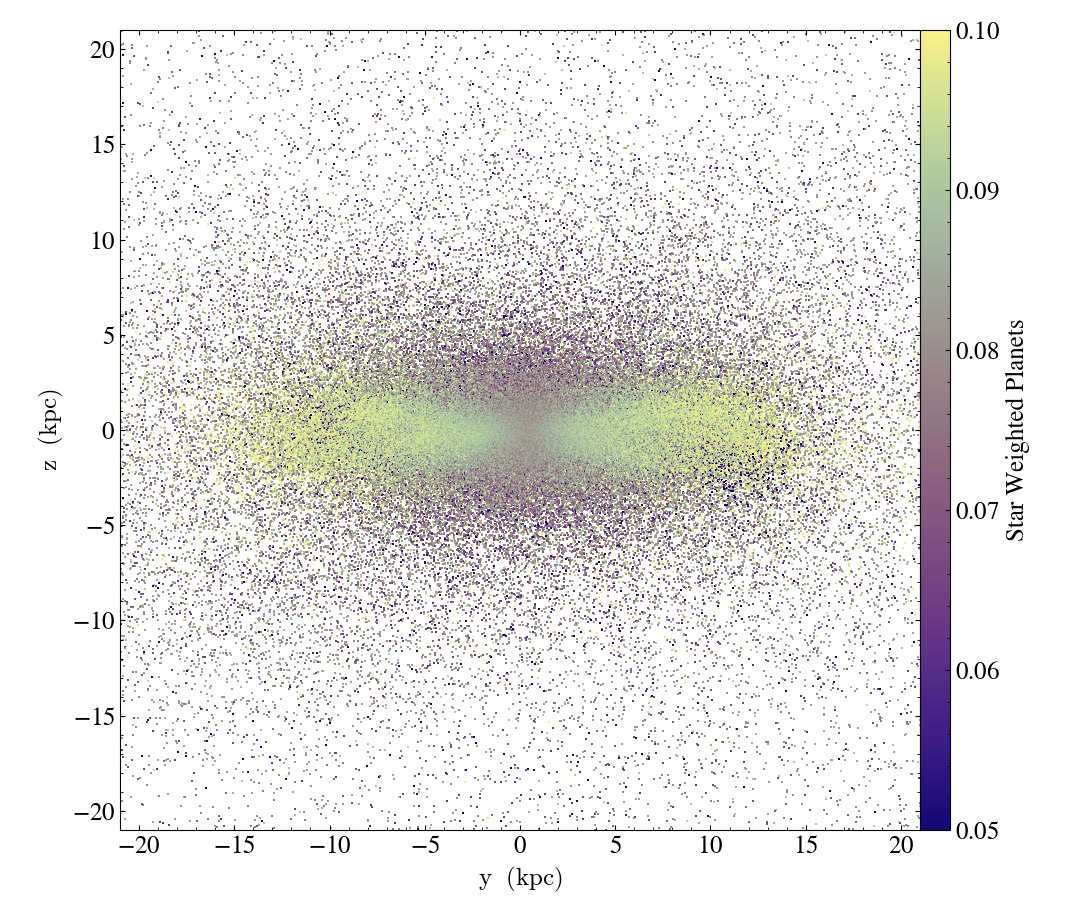
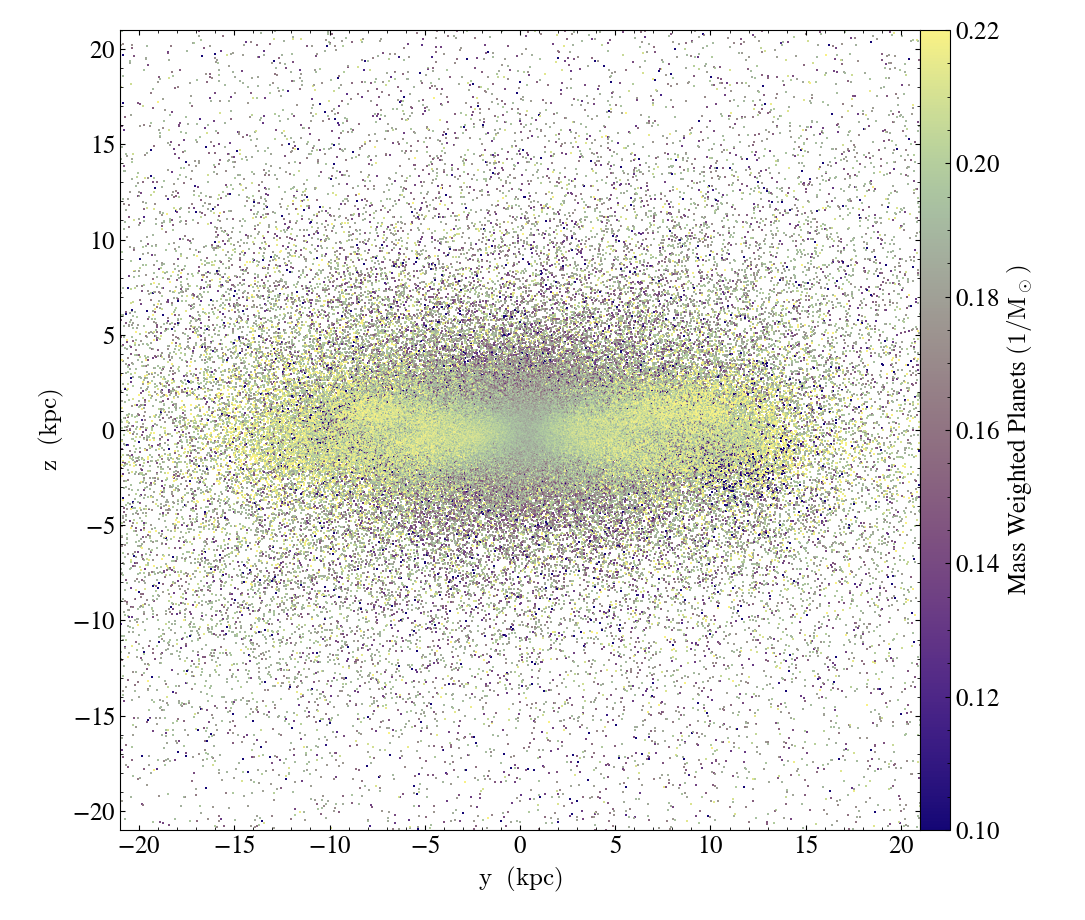

In [25]:
yplot, yplots = plot_maps(rotated_data, axis="x", save=save, no_dwarfs=True, zlims={("stars","star_weighted_planets"): (0.05,.1), ("stars","mass_weighted_planets"): (0.1,.22)})

## 1D Profiles

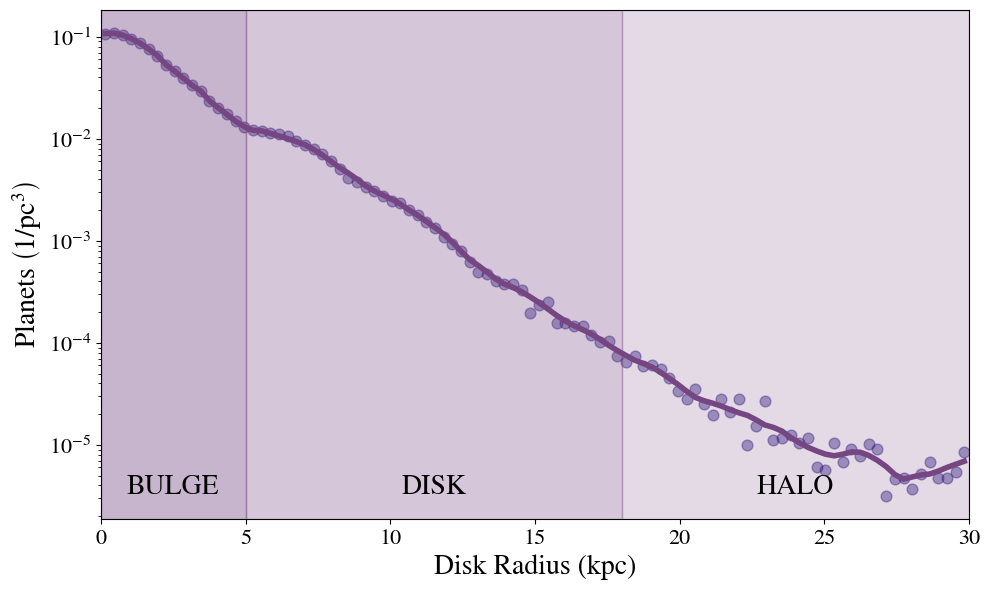

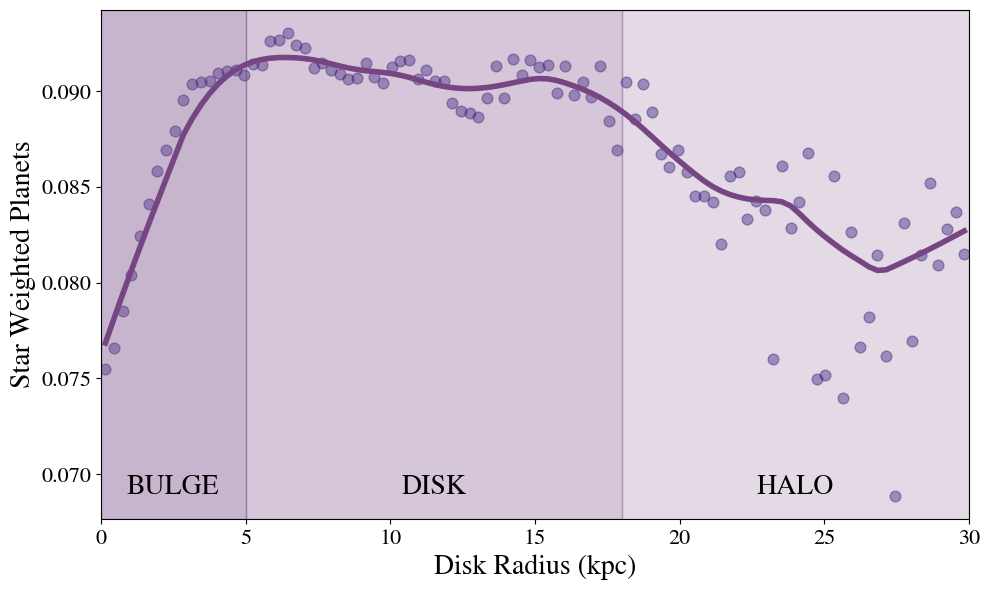

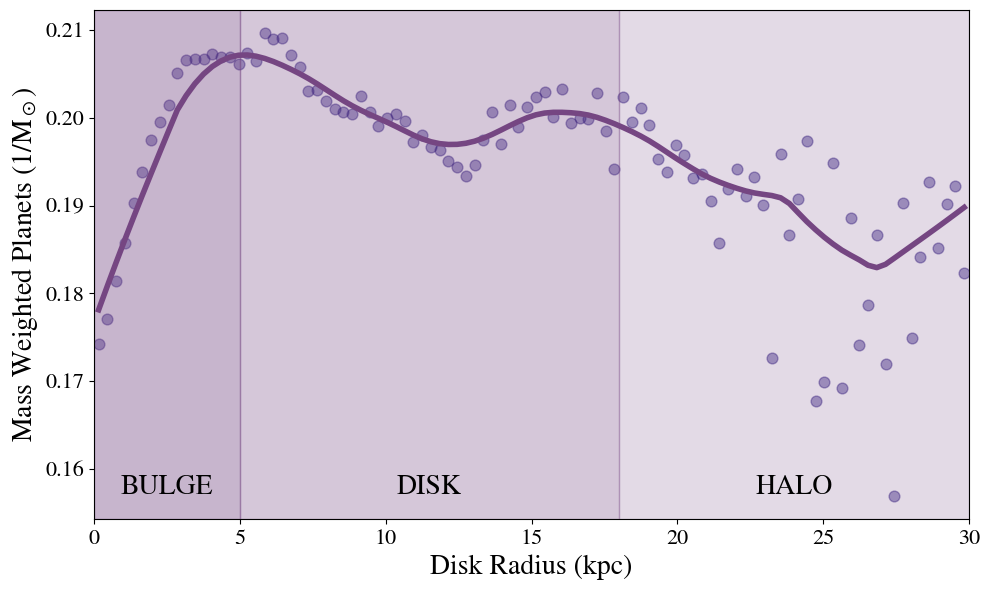

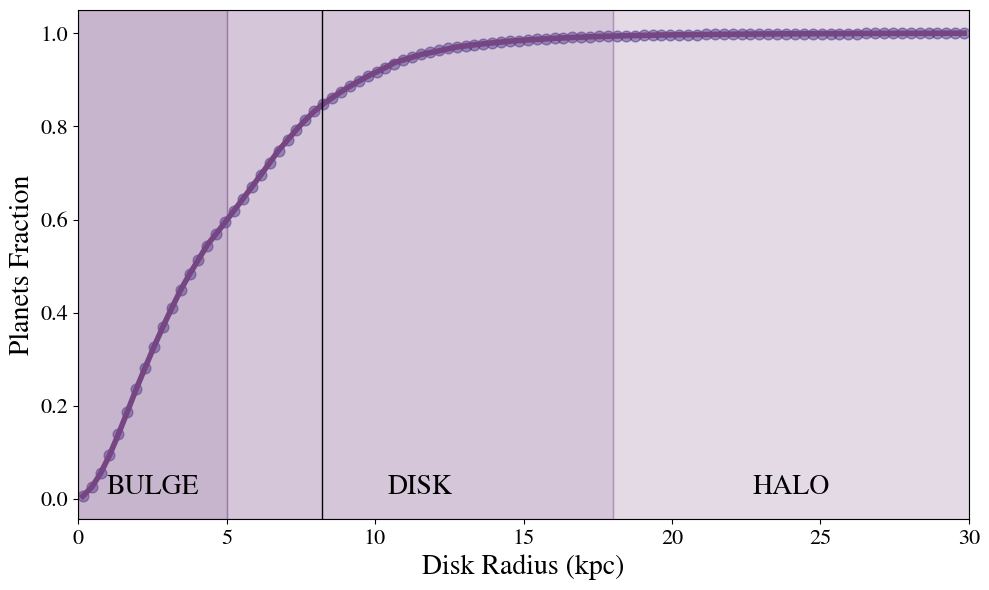

In [12]:
figs, axes = plot_1dprofiles(
    disk_data.sphere([0, 0, 0], 30), halo=mw, disk_height=ds.quan(0.5, "kpc"), save=save, no_dwarfs=True, smoothness = (0.09,0.2)
)

## 2D Profiles


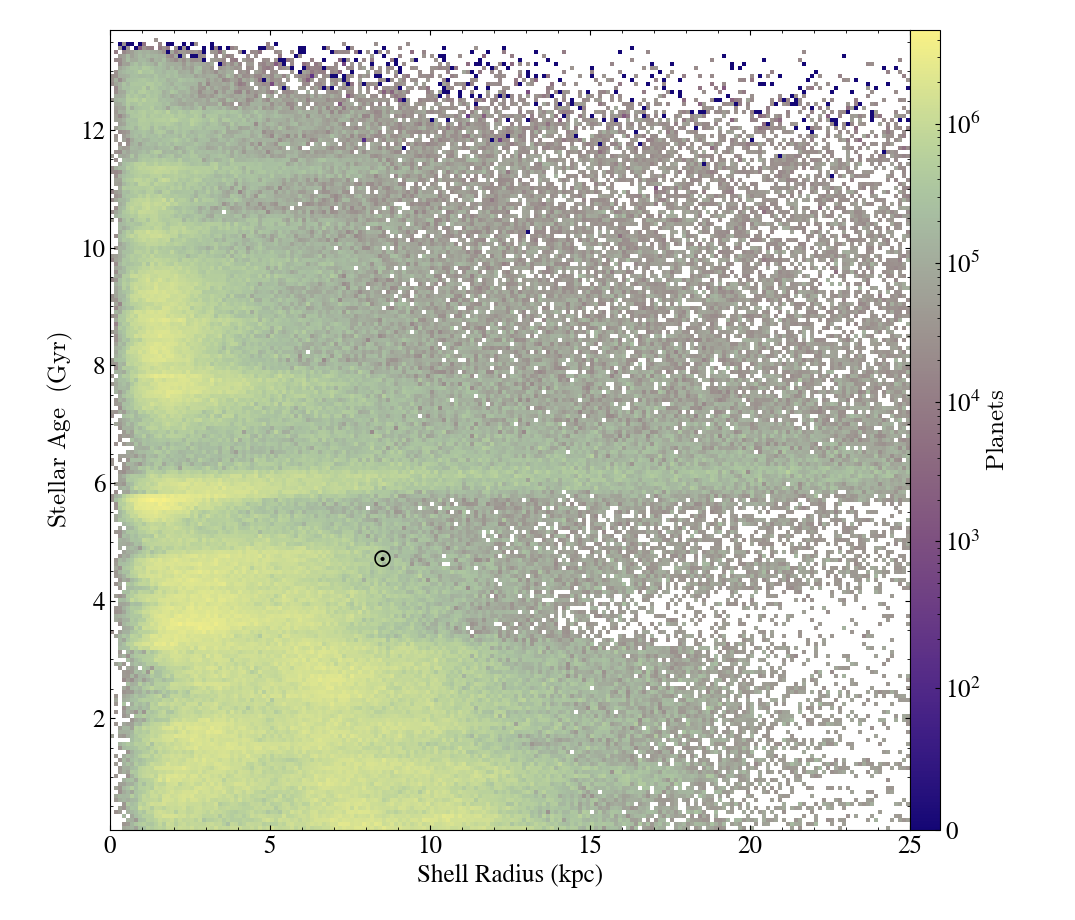


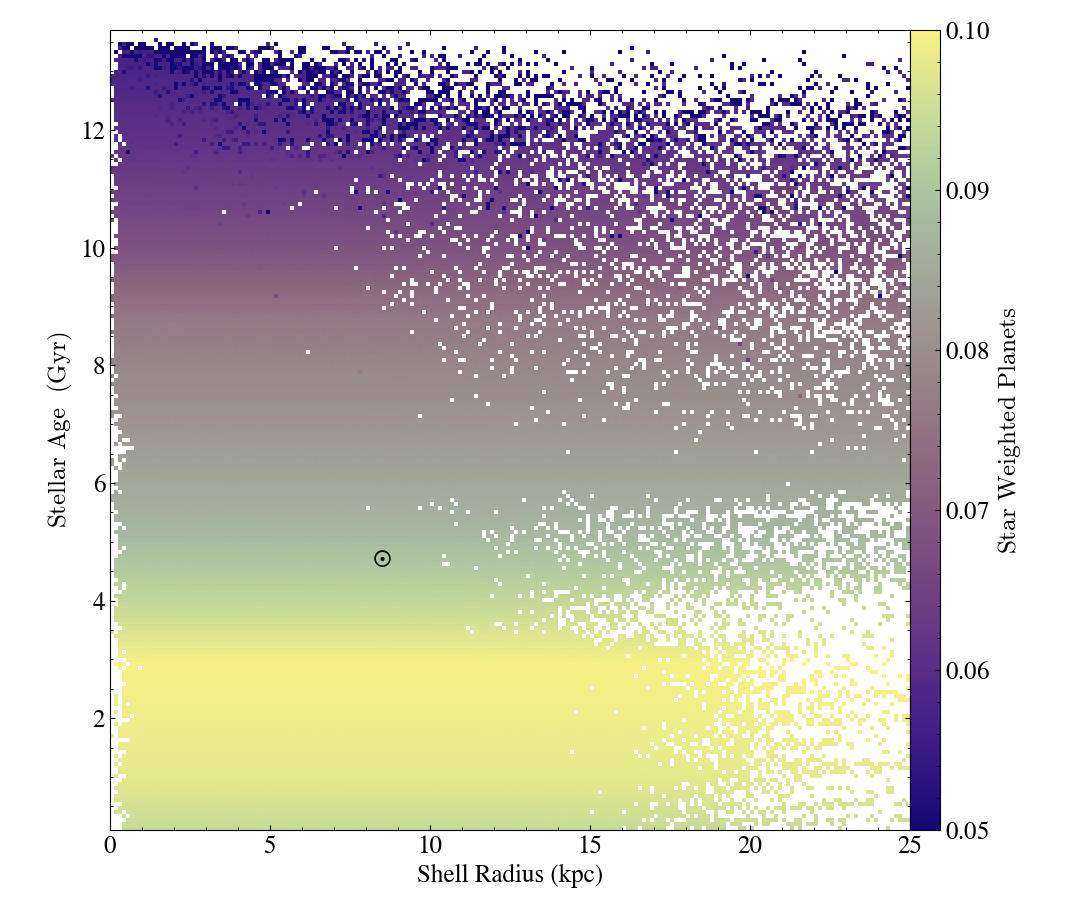


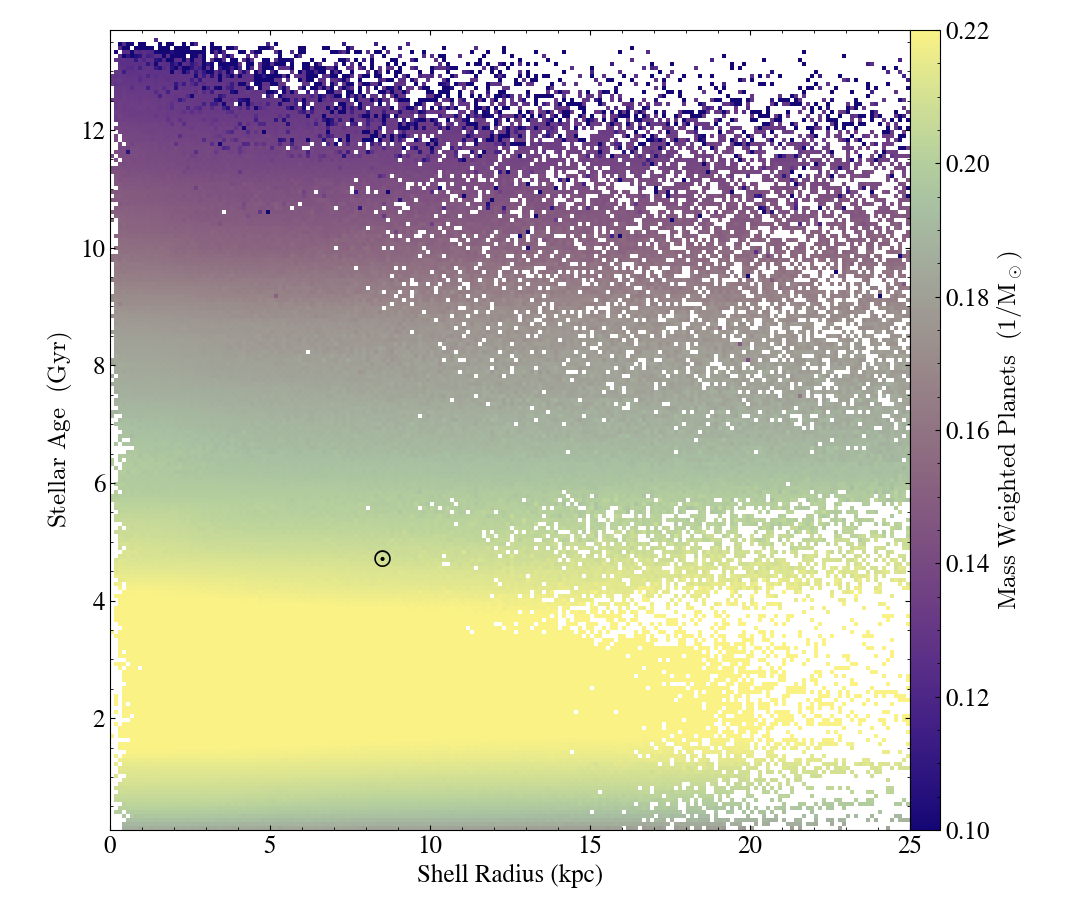

In [23]:
age_plots = plot_2dprofiles(sphere_data, "stellar_age", save=save, no_dwarfs=True, zlims={("stars","star_weighted_planets"): (0.05,.1), ("stars","mass_weighted_planets"): (0.1,.22)})


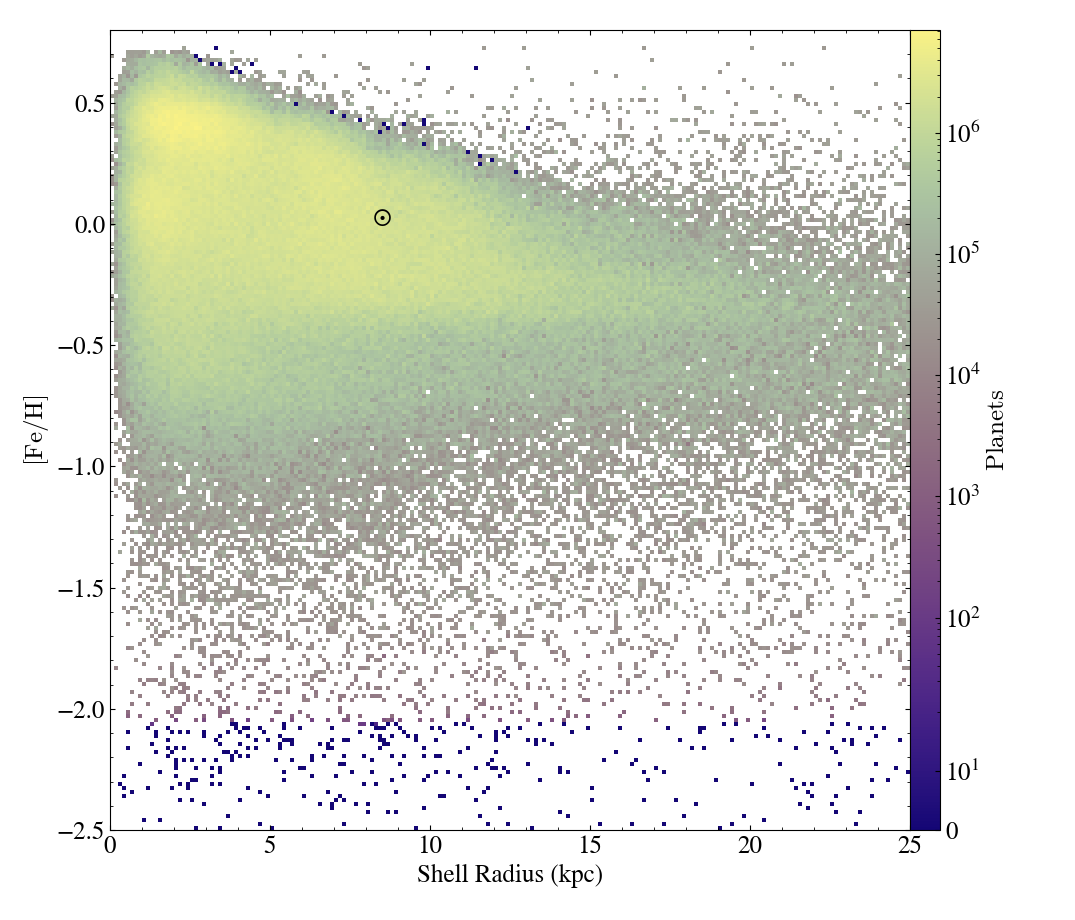


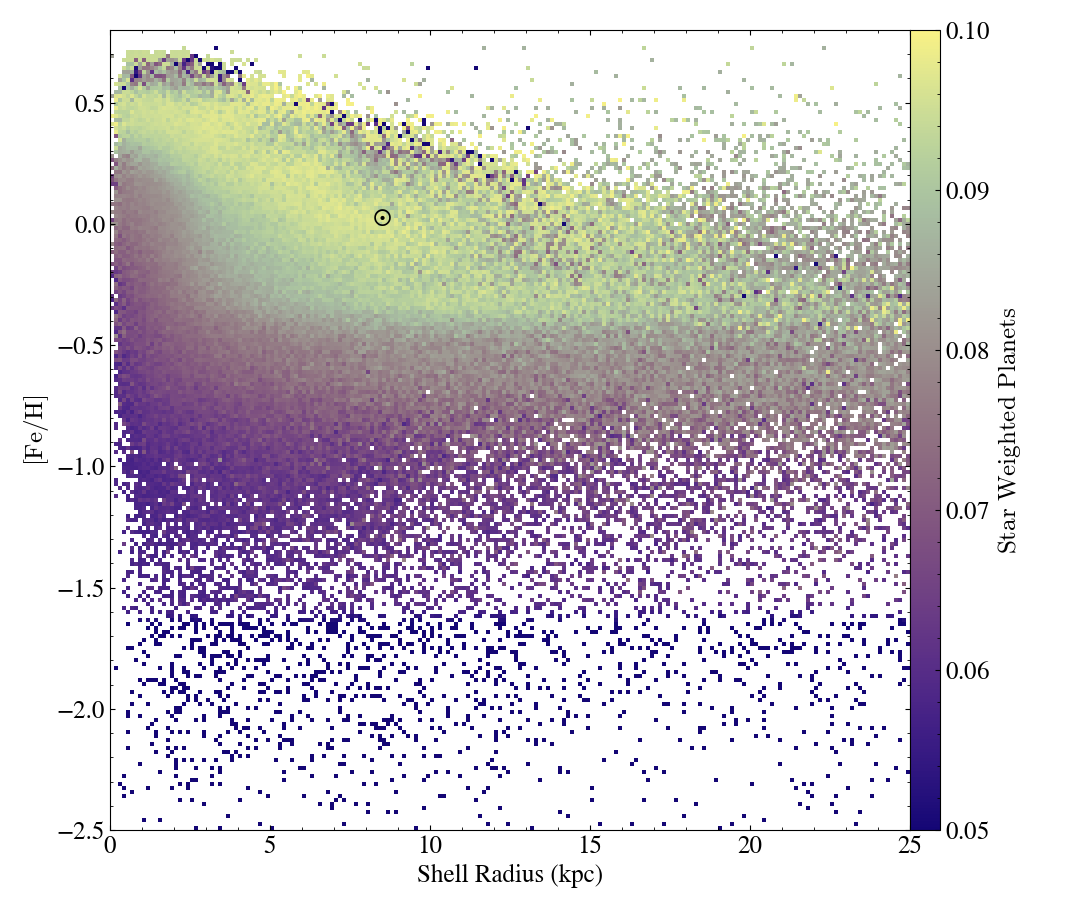


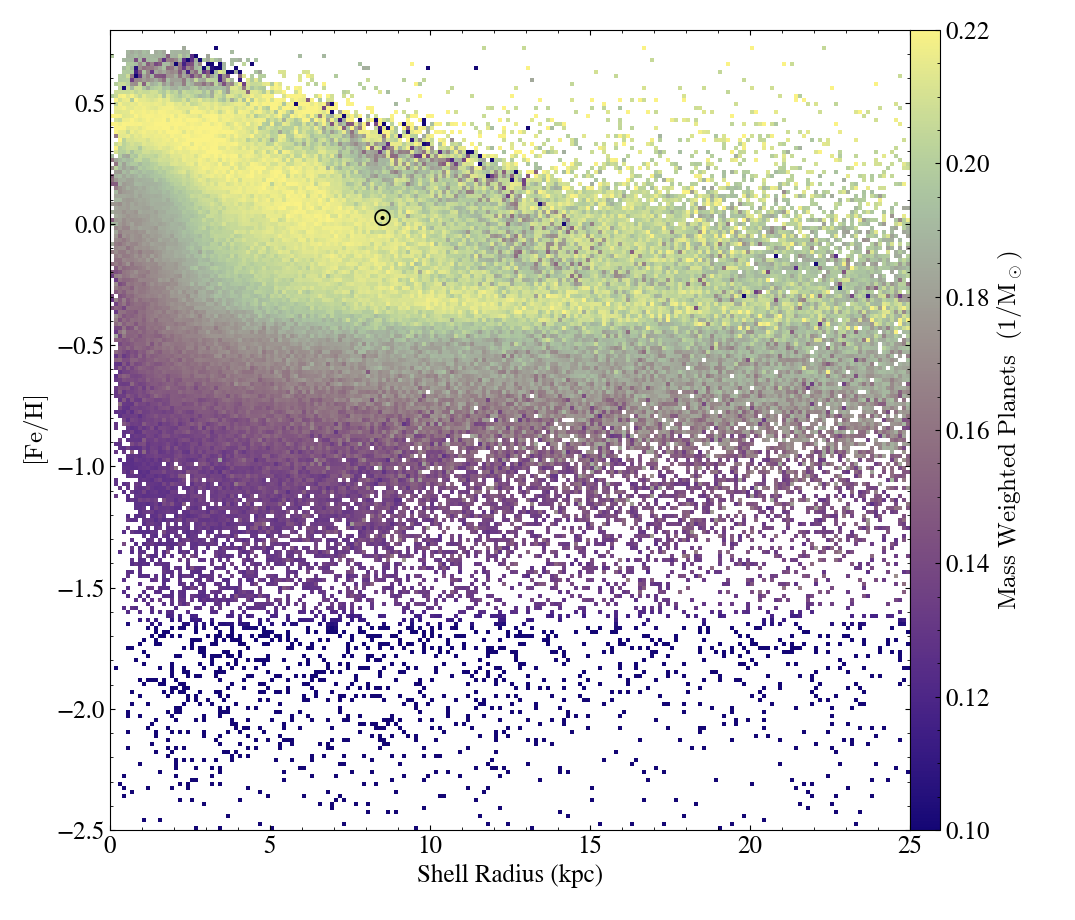

In [22]:
fe_plots = plot_2dprofiles(sphere_data, "metallicity", save=save, no_dwarfs=True, zlims={("stars","star_weighted_planets"): (0.05,.1), ("stars","mass_weighted_planets"): (0.1,.22)})